In [18]:
import json, sys, random
import numpy as np

In [19]:
from keras.models import Sequential 
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
import keras.callbacks

Using TensorFlow backend.


In [20]:
from PIL import Image, ImageDraw

In [21]:
from matplotlib import pyplot as plt

In [22]:
# Download and study the data set
f = open(r'../ships-in-satellite-imagery/shipsnet.json')
dataset = json.load(f)
f.close()

In [23]:
input_data = np.array(dataset['data']).astype('uint8')
output_data = np.array(dataset['labels']).astype('uint8')

In [24]:
# the data set contains 4000 images. 
# One image is represented as a vector of lenght 19200 elements = [(image size: 80x80=6400) * 3 RGB bands]

In [25]:
input_data.shape

(4000, 19200)

In [26]:
input_data

array([[ 82,  89,  91, ...,  86,  88,  89],
       [ 76,  75,  67, ...,  54,  57,  58],
       [125, 127, 129, ..., 111, 109, 115],
       ...,
       [171, 135, 118, ...,  95,  95,  85],
       [ 85,  90,  94, ...,  96,  95,  89],
       [122, 122, 126, ...,  51,  46,  69]], dtype=uint8)

In [27]:
# to be able to read an image we need to reshape the array/input_data

In [28]:
n_spectrum = 3 # color chanel RGB 
weight = 80
height = 80
X = input_data.reshape([-1, n_spectrum, weight, height])
X[0].shape

(3, 80, 80)

In [29]:
# get one channel 
pic = X[3]

red_spectrum = pic[0]
green_spectrum = pic[1]
blue_spectrum = pic[2] 

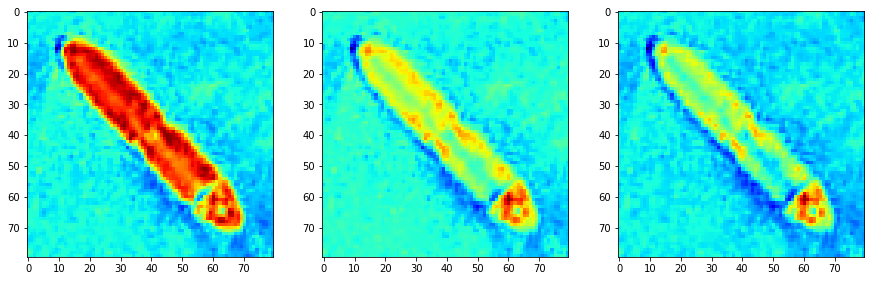

In [30]:
plt.figure(2, figsize = (5*3, 5*1))
plt.set_cmap('jet')

#show each channel
plt.subplot(1, 3, 1)
plt.imshow(red_spectrum)

plt.subplot(1, 3, 2)
plt.imshow(green_spectrum)

plt.subplot(1, 3, 3)
plt.imshow(blue_spectrum)

plt.show()

In [31]:
# just don`t get discouraged if some of the photos as X[0] might not have 3 bands RGB and you only get 1 color. 

In [32]:
# now let`s look at the output: which is a vector of lenght 4000 elements

In [33]:
output_data.shape

(4000,)

In [34]:
# the vector contains int 0 (no ship) and 1 (ship)

In [35]:
output_data

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [36]:
np.bincount(output_data)

array([3000, 1000])

In [37]:
# Vector contains of 3000 zeros and 1000 units. 
# This means that in a dataset of 1000 images tagged with "ship" and 3000 images marked as "not ship".

In [38]:
# Preparing data

In [39]:
# We also need to categorically encode the labels:

In [40]:
# output encoding
y = np_utils.to_categorical(output_data, 2)

In [41]:
# shuffle all indexes
indexes = np.arange(4000)
np.random.shuffle(indexes)

In [42]:
X_train = X[indexes].transpose([0,2,3,1])
y_train = y[indexes]

In [43]:
# normalization 
X_train = X_train / 255 # images are type uint8 with values in the [0, 255] interval and we would like to contain values between 0 and 1

In [44]:
# Train the network

In [45]:
np.random.seed(42)

In [46]:
# network design
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model.add(Dropout(0.25))

model.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

In [47]:
# to explain: relu and
# softmax / dropout 
# see my previous article on https://danielmoraite.github.io/docs/fifth.html

In [48]:
# optimization setup
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy'])

# training
model.fit(
    X_train, 
    y_train,
    batch_size=32,
    epochs=18,
    validation_split=0.2,
    shuffle=True,
    verbose=2)

Train on 3200 samples, validate on 800 samples
Epoch 1/18
 - 47s - loss: 0.4188 - acc: 0.8141 - val_loss: 0.2183 - val_acc: 0.9150
Epoch 2/18
 - 45s - loss: 0.2330 - acc: 0.9059 - val_loss: 0.1533 - val_acc: 0.9475
Epoch 3/18
 - 44s - loss: 0.1742 - acc: 0.9241 - val_loss: 0.1344 - val_acc: 0.9500
Epoch 4/18
 - 44s - loss: 0.1415 - acc: 0.9428 - val_loss: 0.1111 - val_acc: 0.9688
Epoch 5/18
 - 71s - loss: 0.1272 - acc: 0.9513 - val_loss: 0.1119 - val_acc: 0.9600
Epoch 6/18
 - 91s - loss: 0.1119 - acc: 0.9597 - val_loss: 0.0988 - val_acc: 0.9637
Epoch 7/18
 - 81s - loss: 0.1059 - acc: 0.9600 - val_loss: 0.0539 - val_acc: 0.9838
Epoch 8/18
 - 50s - loss: 0.0971 - acc: 0.9669 - val_loss: 0.0538 - val_acc: 0.9825
Epoch 9/18
 - 54s - loss: 0.0818 - acc: 0.9712 - val_loss: 0.0609 - val_acc: 0.9738
Epoch 10/18
 - 50s - loss: 0.0753 - acc: 0.9734 - val_loss: 0.0602 - val_acc: 0.9825
Epoch 11/18
 - 44s - loss: 0.0747 - acc: 0.9728 - val_loss: 0.0614 - val_acc: 0.9762
Epoch 12/18
 - 43s - loss: 

In [49]:
# to explain: categorical_crossentropy 
# maybe explain 'accuracy'
# as well the Loss Function
# see my previous article on https://danielmoraite.github.io/docs/fifth.html
# batch size = 32 photos at once 

In [65]:
# Using Network

# download image
image = Image.open(r'../ships-in-satellite-imagery/scenes/sfbay_1.png')
pix = image.load()

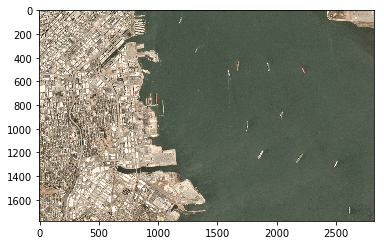

In [66]:
plt.imshow(image)

In [67]:
n_spectrum = 3
width = image.size[0]
height = image.size[1]

In [68]:
# creat vector
picture_vector = []
for chanel in range(n_spectrum):
    for y in range(height):
        for x in range(width):
            picture_vector.append(pix[x, y][chanel])

In [69]:
picture_vector = np.array(picture_vector).astype('uint8')
picture_tensor = picture_vector.reshape([n_spectrum, height, width]).transpose(1, 2, 0)

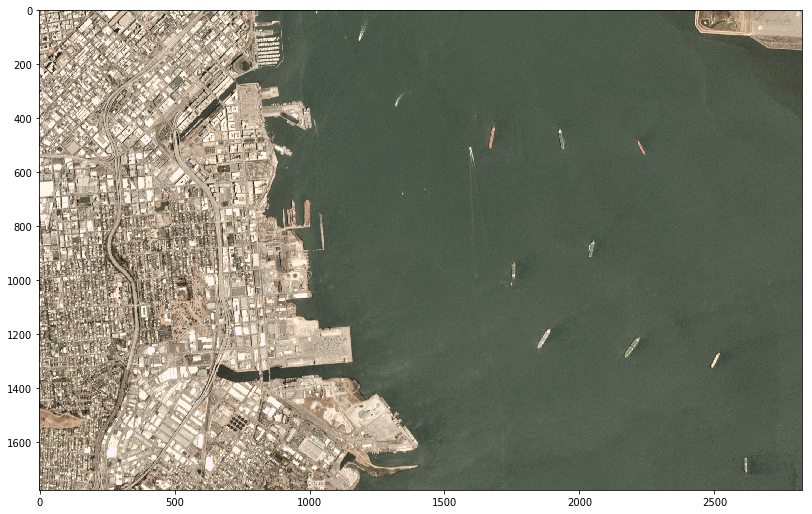

In [70]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3, 1, 1)
plt.imshow(picture_tensor)

plt.show()

In [71]:
picture_tensor = picture_tensor.transpose(2,0,1)

In [72]:
# Search on the image

def cutting(x, y):
    area_study = np.arange(3*80*80).reshape(3, 80, 80)
    for i in range(80):
        for j in range(80):
            area_study[0][i][j] = picture_tensor[0][y+i][x+j]
            area_study[1][i][j] = picture_tensor[1][y+i][x+j]
            area_study[2][i][j] = picture_tensor[2][y+i][x+j]
    area_study = area_study.reshape([-1, 3, 80, 80])
    area_study = area_study.transpose([0,2,3,1])
    area_study = area_study / 255
    sys.stdout.write('\rX:{0} Y:{1}  '.format(x, y))
    return area_study

In [73]:
def not_near(x, y, s, coordinates):
    result = True
    for e in coordinates:
        if x+s > e[0][0] and x-s < e[0][0] and y+s > e[0][1] and y-s < e[0][1]:
            result = False
    return result

In [74]:
def show_ship(x, y, acc, thickness=5):   
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x-th] = -1

    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x+th+80] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y-th][x+i] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+th+80][x+i] = -1

X:1640 Y:420  [[0.0173334 0.9826666]]


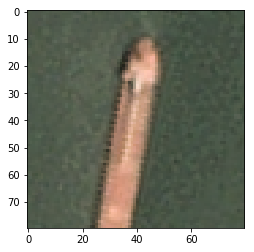

X:1890 Y:430  [[8.028013e-04 9.991972e-01]]


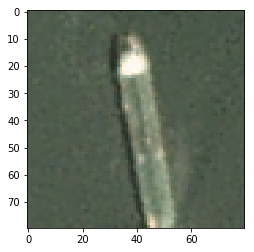

X:2190 Y:460  [[0.03196462 0.96803534]]


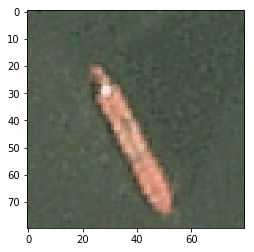

X:860 Y:480  [[0.00938033 0.99061966]]


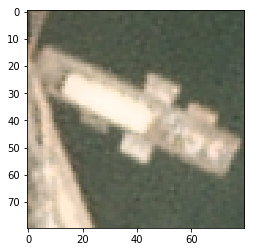

X:950 Y:690  [[0.06126043 0.9387396 ]]


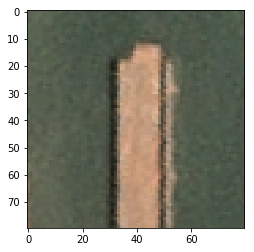

X:2000 Y:850  [[0.06699871 0.9330013 ]]


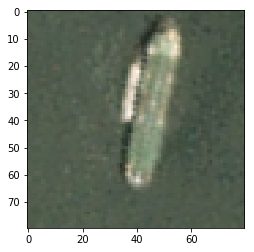

X:1720 Y:920  [[0.06504276 0.9349572 ]]


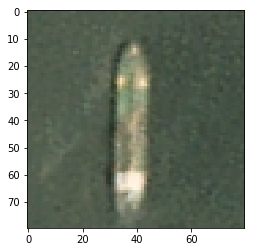

X:1830 Y:1170  [[0.01309848 0.9869016 ]]


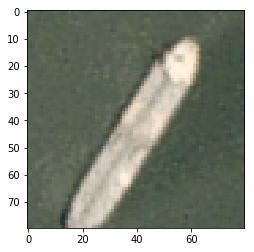

X:2160 Y:1200  [[0.00971615 0.9902838 ]]


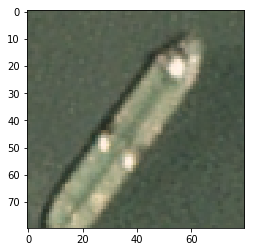

X:2460 Y:1260  [[0.00134368 0.9986563 ]]


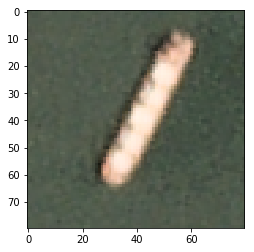

X:1220 Y:1650  [[0.03565859 0.9643414 ]]


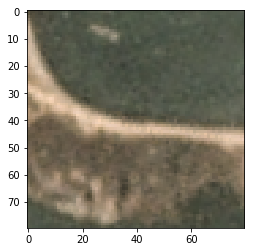

X:1310 Y:1650  [[6.177696e-07 9.999994e-01]]


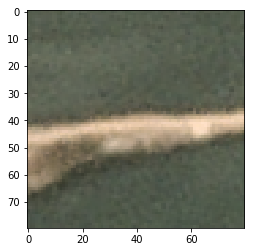

X:2740 Y:1690  

In [75]:
step = 10; coordinates = []
for y in range(int((height-(80-step))/step)):
    for x in range(int((width-(80-step))/step) ):
        area = cutting(x*step, y*step)
        result = model.predict(area)
        if result[0][1] > 0.90 and not_near(x*step,y*step, 88, coordinates):
            coordinates.append([[x*step, y*step], result])
            print(result)
            plt.imshow(area[0])
            plt.show()

In [76]:
# For a better understanding, let`s tag the findings on the image. 

In [77]:
for e in coordinates:
    show_ship(e[0][0], e[0][1], e[1][0][1])

In [78]:
#picture_tensor = picture_tensor.transpose(2,0,1)
picture_tensor = picture_tensor.transpose(1,2,0)
picture_tensor.shape

(1777, 2825, 3)

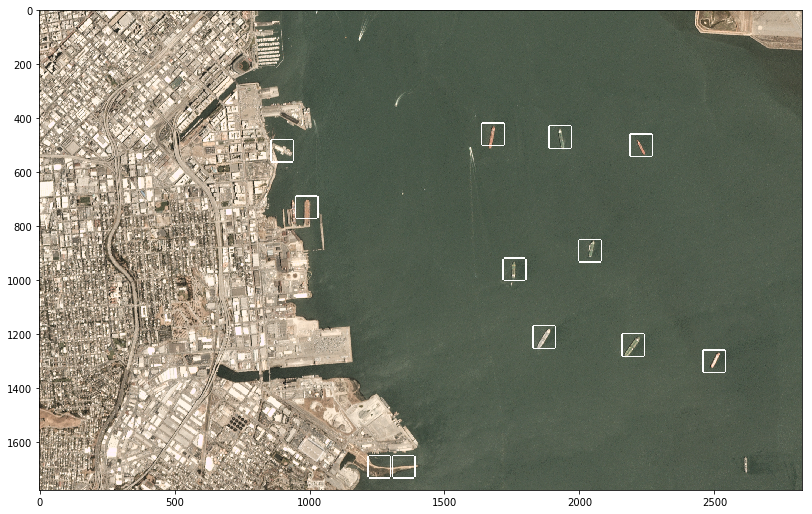

In [79]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3,1,1)
plt.imshow(picture_tensor)

plt.show()